# **Análisis y Limpieza de un Dataset Económico**
### **Nombre del Alumno: Alejandro de Santiago Vicente**
### **Fecha: 28 de octubre de 2024**

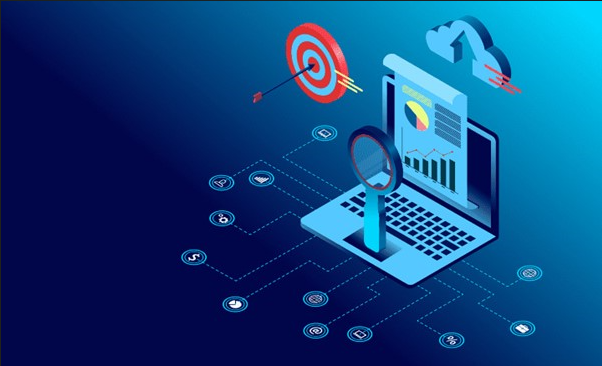

---

Este notebook presenta la resolución del problema de análisis y limpieza de datos económicos descargados desde el Instituto Nacional de Estadística (INE), utilizando técnicas de Python para su manipulación y procesamiento eficiente.


## **Índice**
1. Introducción
2. Funciones desarrolladas y lógica aplicada
3. Módulos utilizados
4. Resultados
5. Bibliografía

---

## **Introducción**

Este trabajo se enfoca en la manipulación y limpieza de un dataset económico descargado desde el sitio oficial del Instituto Nacional de Estadística (INE). El objetivo es procesar un archivo Excel con más de 30 filas y 100 datos, limpiando los datos faltantes o erróneos, transformando la estructura del dataset, y finalmente calculando estadísticas como media, varianza y moda.

La lógica aplicada a este trabajo se basa en la **Programación Orientada a Objetos (POO)** para encapsular los datos en una clase personalizada, permitiendo manipular las columnas del dataset como atributos de objetos.

Se presentarán las funciones clave desarrolladas, los módulos de Python utilizados, y los resultados obtenidos tras aplicar dichas funciones al dataset.

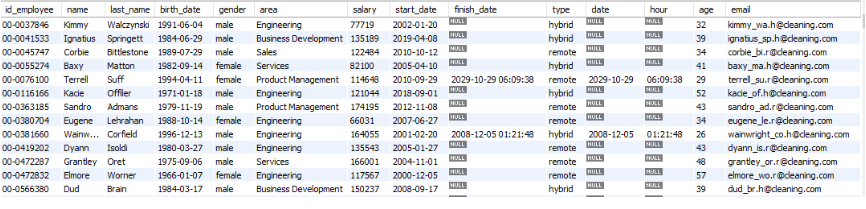


In [2]:
!pip install pandas requests openpyxl

In [18]:
import pandas as pd
import requests
from IPython.display import display
import numpy as np
from scipy import stats

In [40]:
def descargar_datos(url, file_path):
    try:
        response = requests.get(url)
        response.raise_for_status()
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print("Archivo descargado correctamente.")
        df = pd.read_excel(file_path, engine='openpyxl', header=None)
        print("Datos cargados en el dataset.")
        return df
    except requests.exceptions.RequestException as e:
        print(f"Error en la descarga del archivo: {e}")
    except Exception as e:
        print(f"Error al cargar los datos: {e}")

# URL de los datos y la ruta para guardarlos
url = "https://www.ine.es/jaxiT3/files/t/es/xlsx/62271.xlsx?nocab=1"
file_path = "dataset.xlsx"
df = descargar_datos(url, file_path)

# Muestro una vista previa del dataset
display(df.head())

Archivo descargado correctamente.
Datos cargados en el dataset.


C:\Users\CampusFP\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,0,1,2,3,4,5,6,7,8,9
0,Cuentas trimestrales no financieras de los sec...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S11. Sociedades no financieras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Saldos contables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Unidades: %, Millones Euros",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
def limpiar_datos(df):
    # Encuentro la primera fila que contiene datos numéricos
    first_numeric_row = df.apply(lambda x: pd.to_numeric(x, errors='coerce').notna().any()).idxmax()
    
    # Uso esa fila como encabezado y elimino filas anteriores
    df.columns = df.iloc[first_numeric_row]
    df = df.iloc[first_numeric_row + 1:]
    
    # Convierto todas las columnas a numéricas, manteniendo NaN donde sea apropiado
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # Elimino las filas que son completamente NaN
    df = df.dropna(how='all')
    
    # Elimino columnas que son completamente NaN
    df = df.dropna(axis=1, how='all')
    
    return df

# Aplico limpieza de datos
df_limpio = limpiar_datos(df)
display(df_limpio.head())

1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,202820.0,4.4,4.8,74946.0,-3.4,12.7,37.0
10,193549.0,2.8,-8.6,66507.0,-8.9,-26.7,34.4
11,211863.0,3.8,9.8,90689.0,-2.7,27.2,42.8
12,193018.0,5.9,-0.6,71270.0,0.3,-8.1,36.9
13,194208.0,9.1,3.1,77580.0,10.9,6.3,39.9


Parte Reflexiva: Limpieza de Datos

Alternativa Investigada:
Para este proceso de limpieza de datos, utilicé una IA generativa para explorar varias técnicas en Python, como el uso de la función dropna(). Este método permite eliminar filas o columnas completas que contengan valores nulos (NaN), lo cual puede ser útil para mantener solo las observaciones completas en el análisis.

Reflexión:
He optado por utilizar un método que extrae la primera fila con datos numéricos y la usa como encabezado, eliminando filas anteriores que no contienen información útil para el análisis. Este enfoque asegura que la estructura del dataset sea clara y que cada columna represente una variable con significado estadístico. Adicionalmente, convierto todas las columnas a valores numéricos cuando es posible, y solo se eliminan aquellas filas y columnas que están completamente vacías, preservando así la mayor cantidad posible de datos.

El uso de pd.to_numeric con errors='coerce' permite manejar los valores no numéricos y convertirlos en NaN de forma que el análisis posterior se vea menos afectado por la presencia de datos fuera de lugar o categorías en columnas donde no deberían estar. Esto también facilita la limpieza de datos al mantener los valores nulos solo en lugares donde no hay datos significativos, permitiendo una visualización más directa y organizada.

Mejora del Código:
Con esta elección, el código resulta más adecuado para conjuntos de datos económicos, donde cada dato tiene el potencial de ser importante. Mantener las filas completas y eliminar únicamente los valores que sean totalmente irrelevantes asegura que los datos relevantes estén disponibles para análisis sin introducir información artificial (como ceros) que podría desvirtuar los resultados. Este enfoque permite preservar la integridad del dataset y facilita la preparación para análisis estadísticos más precisos.

Esta reflexión se alinea con el código de limpieza proporcionado, donde se mantiene la mayoría de los datos originales, eliminando solo aquellas filas y columnas que están completamente vacías.

In [50]:
def transformar_datos(df):
    # Transpongo todas las columnas
    df_trans = df.transpose()
    
    # La primera fila ahora contiene los nombres de las columnas
    df_trans.columns = df_trans.iloc[0]
    
    # Elimino la primera fila ya que ahora son los nombres de las columnas
    df_trans = df_trans.iloc[1:]
    
    # Reseteo el índice y lo nombro
    df_trans.reset_index(inplace=True)
    df_trans.rename(columns={'index': 'Año'}, inplace=True)
    
    return df_trans

# Aplico la transformación
df_transformado = transformar_datos(df_limpio)
df_transformado.to_excel("dataset_transformado.xlsx", index=False)

# Verifico la estructura del DataFrame
print("Forma del DataFrame:")
print(df_transformado.shape)
print("\nColumnas del DataFrame:")
print(df_transformado.columns)
print("\nPrimeras filas del DataFrame:")
print(df_transformado.head())

# Me aseguro de que la columna 'Año' sea el índice
if 'Año' in df_transformado.columns:
    df_transformado.set_index('Año', inplace=True)
else:
    print("La columna 'Año' no está presente en el DataFrame.")
    print("Columnas disponibles:", df_transformado.columns)

# Extraigo las colecciones de datos de cada tipo
colecciones = {col: df_transformado[col].dropna().tolist() for col in df_transformado.columns}

# Muestro las primeras entradas de cada colección
for col, datos in colecciones.items():
    print(f"\nPrimeros 5 datos de la columna '{col}':")
    print(datos[:5])

Forma del DataFrame:
(6, 205)

Columnas del DataFrame:
Index([     1.0, 202820.0, 193549.0, 211863.0, 193018.0, 194208.0, 188355.0,
       204113.0, 182338.0, 177944.0,
       ...
        87703.0,  85584.0,  84173.0,  82388.0,  80383.0,  79176.0,  77058.0,
        75502.0,  73872.0,  72573.0],
      dtype='float64', name=nan, length=205)

Primeras filas del DataFrame:
nan  1.0       202820.0  193549.0  211863.0  193018.0  194208.0  188355.0  \
0         NaN       4.4       2.8       3.8       5.9       9.1      13.9   
1         NaN       4.8      -8.6       9.8      -0.6       3.1      -7.7   
2         NaN   74946.0   66507.0   90689.0   71270.0   77580.0   72967.0   
3         NaN      -3.4      -8.9      -2.7       0.3      10.9      22.2   
4         NaN      12.7     -26.7      27.2      -8.1       6.3     -21.7   

nan  204113.0  182338.0  177944.0  ...  87703.0   85584.0   84173.0   \
0        16.1      17.1      16.3  ...       9.1       8.1       9.2   
1        11.9       2.

In [52]:
def almacenar_datos(df):
    with open('lista.txt', 'w') as f:
        for index, row in df.iterrows():
            f.write(f"{index} {' '.join(map(str, row.values))}\n")

# Guardar los datos transformados en un archivo de texto
almacenar_datos(df_transformado)
print("Datos concatenados y guardados en lista.txt.")

Datos concatenados y guardados en lista.txt.


In [56]:
import numpy as np
from scipy import stats

def estadisticas(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        if df[column].empty or df[column].isna().all():
            print(f"Columna {column} está vacía o contiene solo valores NaN.")
            continue
        
        media = df[column].mean()
        varianza = df[column].var()
        
        # Calculo la moda de manera más robusta
        moda_series = df[column].mode()
        if not moda_series.empty:
            moda = moda_series.iloc[0]
        else:
            moda = np.nan  # No hay moda
        
        print(f"Columna {column}:")
        print(f"  Media: {media:.2f}")
        print(f"  Varianza: {varianza:.2f}")
        print(f"  Moda: {moda:.2f}" if not np.isnan(moda) else "  Moda: No hay moda única")
        print()

# Calcular estadísticas
estadisticas(df_transformado)

Columna 1.0 está vacía o contiene solo valores NaN.
Columna 202820.0:
  Media: 12500.25
  Varianza: 935873399.98
  Moda: -3.40

Columna 193549.0:
  Media: 11083.33
  Varianza: 737228287.92
  Moda: -26.70

Columna 211863.0:
  Media: 15128.32
  Varianza: 1370260323.89
  Moda: -2.70

Columna 193018.0:
  Media: 11884.07
  Varianza: 846405623.85
  Moda: -8.10

Columna 194208.0:
  Media: 12941.55
  Varianza: 1002751188.90
  Moda: 3.10

Columna 188355.0:
  Media: 12168.73
  Varianza: 887143475.46
  Moda: -21.70

Columna 204113.0:
  Media: 15550.55
  Varianza: 1446096139.35
  Moda: 11.90

Columna 182338.0:
  Media: 11858.10
  Varianza: 841139390.78
  Moda: 1.60

Columna 177944.0:
  Media: 11675.13
  Varianza: 815030529.97
  Moda: 7.60

Columna 165347.0:
  Media: 9956.58
  Varianza: 593714943.88
  Moda: -20.20

Columna 175831.0:
  Media: 12482.65
  Varianza: 931340816.02
  Moda: 11.90

Columna 155651.0:
  Media: 9161.35
  Varianza: 502700901.27
  Moda: -5.40

Columna 153016.0:
  Media: 9700.35


In [58]:
class Dataset:
    def __init__(self, **columns):
        self.__dict__.update(columns)

    def __str__(self):
        return '\n'.join(f"{k}: {v}" for k, v in self.__dict__.items() if pd.notna(v))

    def actualizar_atributo(self, atributo, valor):
        if atributo in self.__dict__:
            setattr(self, atributo, valor)
        else:
            print(f"Atributo '{atributo}' no encontrado.")

    def __eq__(self, other):
        return self.__dict__.get(list(self.__dict__.keys())[1], 0) == other.__dict__.get(list(other.__dict__.keys())[1], 0)

    def __add__(self, other):
        return Dataset(**{k: self.__dict__.get(k, 0) + other.__dict__.get(k, 0) for k in self.__dict__})

    def __sub__(self, other):
        return Dataset(**{k: self.__dict__.get(k, 0) - other.__dict__.get(k, 0) for k in self.__dict__})

    def __lt__(self, other):
        return self.__dict__.get(list(self.__dict__.keys())[1], 0) < other.__dict__.get(list(other.__dict__.keys())[1], 0)

# Creo instancias y prueba de métodos
objetos = [
    Dataset(**{str(k): v for k, v in df_transformado.iloc[i].to_dict().items() if pd.notna(v)})
    for i in range(5)
]

# Imprimo cada objeto
for obj in objetos:
    print(obj)
    print("-" * 50)

202820.0: 4.4
193549.0: 2.8
211863.0: 3.8
193018.0: 5.9
194208.0: 9.1
188355.0: 13.9
204113.0: 16.1
182338.0: 17.1
177944.0: 16.3
165347.0: 15.3
175831.0: 11.9
155651.0: 6.6
153016.0: 23.9
143464.0: -3.7
157162.0: -10.0
146050.0: -10.1
123464.0: -25.6
148937.0: -5.2
174571.0: 5.1
162488.0: 4.1
165916.0: 4.7
157102.0: 4.5
166127.0: 2.5
156096.0: 3.7
158503.0: 4.0
150341.0: 3.9
162083.0: 6.1
150565.0: 4.3
152463.0: 5.4
144659.0: 4.4
152708.0: 2.3
144312.0: 3.6
144599.0: 3.4
138596.0: 4.2
149216.0: 4.8
139360.0: 5.7
139833.0: 4.7
132959.0: 5.4
142331.0: 2.5
131869.0: 1.5
133552.0: 1.8
126191.0: 1.0
138891.0: -1.4
129913.0: -0.9
131235.0: -1.9
124884.0: -3.6
140793.0: -3.0
131042.0: -3.8
133730.0: -5.0
129530.0: -3.8
145161.0: -3.6
136252.0: -2.2
140697.0: -1.0
134615.0: -0.2
150622.0: 0.5
139319.0: -2.8
142120.0: -3.4
134840.0: -1.0
149939.0: -0.8
143316.0: -3.5
147099.0: -3.7
136137.0: -3.0
151161.0: 5.2
148590.0: 10.9
152677.0: 11.8
140372.0: 10.4
143702.0: 10.8
133945.0: 9.7
136564.0: 

## **Webgrafía y Bibliografía**

1. Instituto Nacional de Estadística (INE). (2024). *Datos estadísticos económicos de España*. Recuperado de https://www.ine.es
2. McKinney, W. (2017). *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython*. O'Reilly Media.
3. Pedregosa, F., et al. (2011). *Scikit-learn: Machine Learning in Python*. Journal of Machine Learning Research, 12, 2825-2830.
4. Wes McKinney. (2010). *Data Structures for Statistical Computing in Python*. Proceedings of the 9th Python in Science Conference.
5. NumPy Developers. (2021). *NumPy Reference*. Disponible en https://numpy.org/doc/
